# PYTHON XGBOOST PERFORMANCE DEMO

#### TRAINING AND TEST DATASET

In [1]:
# Create Regression Task
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100000, n_features=20, n_informative=5, bias=0.0, random_state=123)

# Split into Training and Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=123)

print('X has shape: '       + str(X.shape))
print('X_train has shape: ' + str(X_train.shape))
print('X_test has shape: '  + str(X_test.shape))

X has shape: (100000, 20)
X_train has shape: (80000, 20)
X_test has shape: (20000, 20)


#### DECISION TREE

In [11]:
import time

start = time.time()

# Fit Decision Tree Model on Training Data
from sklearn.tree import DecisionTreeRegressor

modelTREE = DecisionTreeRegressor(max_depth=None, min_samples_split=20, random_state=123)
modelTREE.fit(X_train, y_train)

end = time.time()

# Make Predictions on Test Data
ypredTREE = modelTREE.predict(X_test)

# Compute Test Error and Training Time
from sklearn.metrics import mean_absolute_error
import numpy as np

maeTREE = np.round(mean_absolute_error(y_test, ypredTREE), 2)
timeTREE = end-start

print('Mean Absolute Error on Test Data is: ' + str(maeTREE))
print('Training Time was: %.0f sec.' %timeTREE)

Mean Absolute Error on Test Data is: 19.54
Training Time was: 2 sec.


#### RANDOM FOREST

In [8]:
import time

start = time.time()

# Fit Random Forest Model on Training Data
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, max_depth=None, max_features='sqrt', random_state=123, n_jobs=-1)
modelRF.fit(X_train, y_train)

end = time.time()

# Make Predictions on Test Data
ypredRF = modelRF.predict(X_test)

# Compute Test Error and Training Time
from sklearn.metrics import mean_absolute_error
import numpy as np

maeRF = np.round(mean_absolute_error(y_test, ypredRF), 2)
timeRF = end-start

print('Mean Absolute Error on Test Data is: ' + str(maeRF))
print('Training Time was: %.0f sec.' %timeRF)

Mean Absolute Error on Test Data is: 16.2
Training Time was: 64 sec.


#### GRADIENT BOOSTING MACHINE

In [5]:
import time

start = time.time()

# Fit Model on Training Data
from sklearn.ensemble import GradientBoostingRegressor

modelGBM = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=123)
modelGBM.fit(X_train, y_train)

end = time.time()

# Make Predictions on Test Data
ypredGBM = modelGBM.predict(X_test)

# Compute Test Error and Training Time
from sklearn.metrics import mean_absolute_error
import numpy as np

maeGBM = np.round(mean_absolute_error(y_test, ypredGBM), 2)
timeGBM = end-start

print('Mean Absolute Error on Test Data is: ' + str(maeGBM))
print('Training Time was: %.0f sec.' %timeGBM)

Mean Absolute Error on Test Data is: 3.33
Training Time was: 158 sec.


#### XGBOOST

In [ ]:
pip install xgboost

In [14]:
import time

start = time.time()

# Fit Model on Training Data
import xgboost as xgb

modelXGB = xgb.XGBRegressor(objective="reg:squarederror", booster='gbtree', n_estimators=1000, 
                            learning_rate=0.1, max_depth=1, reg_lambda=0, random_state=123)
modelXGB.fit(X_train, y_train)

end = time.time()

# Make Predictions on Test Data
ypredXGB = modelXGB.predict(X_test)

# Compute Test Error and Training Time
from sklearn.metrics import mean_absolute_error
import numpy as np

maeXGB = np.round(mean_absolute_error(y_test, ypredXGB), 2)
timeXGB = end-start

print('Mean Absolute Error on Test Data is: ' + str(maeXGB))
print('Training Time was: %.0f sec.' %timeXGB)

Mean Absolute Error on Test Data is: 3.72
Training Time was: 4 sec.


#### RESULTS

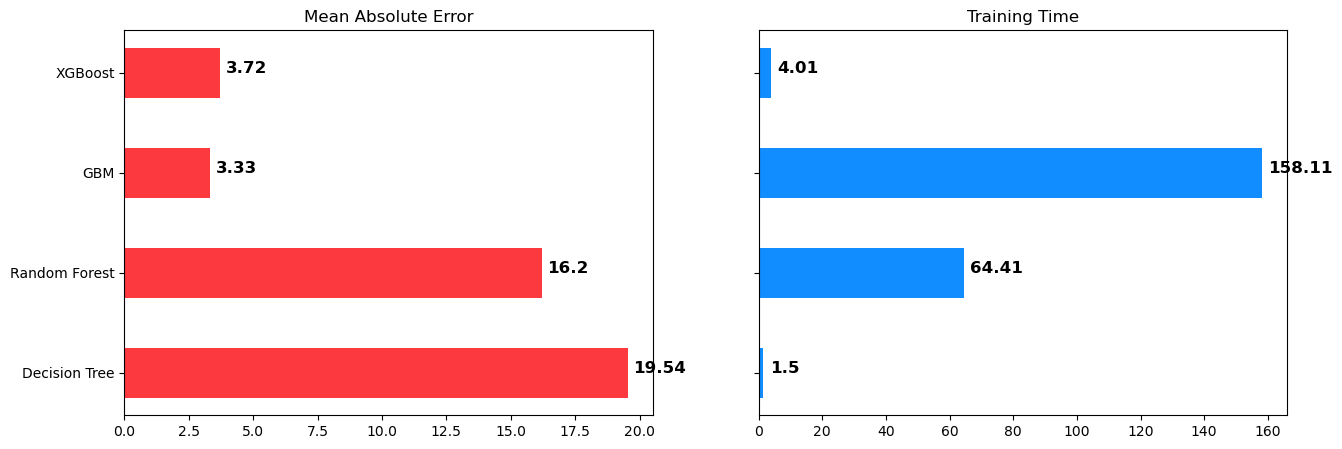

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)

x  = ['Decision Tree', 'Random Forest', 'GBM','XGBoost']
y1 = [maeTREE, maeRF, maeGBM, maeXGB]
y2 = [timeTREE, timeRF, timeGBM, timeXGB]

fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(15,5))

ax1.set_title('Mean Absolute Error')
ax1.barh(x, y1, height=0.5, color='#FC393E', tick_label=y1)
for i in [0,1,2,3]:
    ax1.text(y1[i]+0.2, x[i], y1[i], color='#000000', weight='semibold', size=12)

ax2.set_title('Training Time')
ax2.barh(x, y2, height=0.5, color='#118DFF')
for i in [0,1,2,3]:
    ax2.text(y2[i]+2, x[i], np.round(y2[i], 2), color='#000000', weight='semibold', size=12)
    
plt.show()